# This is Jeopardy!

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and/or other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to write several functions that investigate a dataset of _Jeopardy!_ questions and answers. Filter the dataset for topics that you're interested in, compute the average difficulty of those questions, and train to become the next Jeopardy champion!

## Prerequisites

In order to complete this project, you should have completed the Pandas lessons in the <a href="https://www.codecademy.com/learn/paths/analyze-data-with-python">Analyze Data with Python Skill Path</a>. You can also find those lessons in the <a href="https://www.codecademy.com/learn/data-processing-pandas">Data Analysis with Pandas course</a> or the <a href="https://www.codecademy.com/learn/paths/data-science/">Data Scientist Career Path</a>.

Finally, the <a href="https://www.codecademy.com/learn/practical-data-cleaning">Practical Data Cleaning</a> course may also be helpful.

## Project Requirements

1. We've provided a csv file containing data about the game show _Jeopardy!_ in a file named `jeopardy.csv`. Load the data into a DataFrame and investigate its contents. Try to print out specific columns.

   Note that in order to make this project as "real-world" as possible, we haven't modified the data at all - we're giving it to you exactly how we found it. As a result, this data isn't as "clean" as the datasets you normally find on Codecademy. More specifically, there's something odd about the column names. After you figure out the problem with the column names, you may want to rename them to make your life easier for the rest of the project.
   
   In order to display the full contents of a column, we've added this line of code for you:
   
   ```py
   pd.set_option('display.max_colwidth', None)
   ```

In [84]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('jeopardy.csv')
# remove whitespaces in keys
df.columns = df.columns.str.strip()
#convert to datetime
df['Air Date'] = pd.to_datetime(df['Air Date'])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Show Number  216930 non-null  int64         
 1   Air Date     216930 non-null  datetime64[ns]
 2   Round        216930 non-null  object        
 3   Category     216930 non-null  object        
 4   Value        213296 non-null  object        
 5   Question     216930 non-null  object        
 6   Answer       216927 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.6+ MB
None


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


2. Write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned a DataFrame of 49 rows. Every row had the strings `"King"` and `"England"` somewhere in its `" Question"`.

   Test your function by printing out the column containing the question of each row of the dataset.

In [85]:
def find_content(list_of_words, df):
    res = df[df['Question'].apply(lambda x: any(word.lower() in x.lower() for word in list_of_words))]
    return res

print(find_content(['football'], df))

        Show Number   Air Date             Round  \
1              4680 2004-12-31         Jeopardy!   
13             4680 2004-12-31         Jeopardy!   
438            6037 2010-12-07         Jeopardy!   
588            3036 1997-11-10  Double Jeopardy!   
823            4335 2003-06-06  Double Jeopardy!   
...             ...        ...               ...   
214266         5031 2006-06-26         Jeopardy!   
215537         4216 2002-12-23  Double Jeopardy!   
216167         1983 1993-03-31         Jeopardy!   
216267         5236 2007-05-21         Jeopardy!   
216346         3919 2001-09-20         Jeopardy!   

                               Category  Value  \
1       ESPN's TOP 10 ALL-TIME ATHLETES   $200   
13      ESPN's TOP 10 ALL-TIME ATHLETES   $600   
438                         TIMELESS TV   $800   
588                 OFF TO A GOOD START   $800   
823                         "S"-OTERICA  $1200   
...                                 ...    ...   
214266                  W

3. Test your original function with a few different sets of words to try to find some ways your function breaks. Edit your function so it is more robust.

   For example, think about capitalization. We probably want to find questions that contain the word `"King"` or `"king"`.
   
   You may also want to check to make sure you don't find rows that contain substrings of your given words. For example, our function found a question that didn't contain the word `"king"`, however it did contain the word `"viking"` &mdash; it found the `"king"` inside `"viking"`. Note that this also comes with some drawbacks &mdash; you would no longer find questions that contained words like `"England's"`.

In [86]:
test_df = find_content(['king'], df)
contains_viking = test_df['Question'].apply(lambda x: 'viking' in x.lower()).any()
print(contains_viking)

True


4. We may want to eventually compute aggregate statistics, like `.mean()` on the `" Value"` column. But right now, the values in that column are strings. Convert the`" Value"` column to floats. If you'd like to, you can create a new column with float values.

   Now that you can filter the dataset of question, use your new column that contains the float values of each question to find the "difficulty" of certain topics. For example, what is the average value of questions that contain the word `"King"`?
   
   Make sure to use the dataset that contains the float values as the dataset you use in your filtering function.

In [87]:
import numpy as np
def convert_value_to_float(df):
    return df['Value'].apply(lambda x: float(str(x)[1:].replace(',','')) if x not in [None, 'None', np.nan] else 0.0)

df['Float Value'] = convert_value_to_float(df)

def find_difficulty(list_of_words, df):
    res = df[df['Question'].apply(lambda x: any(word.lower() in x.lower() for word in list_of_words))]
    return res['Float Value'].mean()

print(find_difficulty(['king'], df))

771.8833850722094


5. Write a function that returns the count of unique answers to all of the questions in a dataset. For example, after filtering the entire dataset to only questions containing the word `"King"`, we could then find all of the unique answers to those questions. The answer "Henry VIII" appeared 55 times and was the most common answer.

In [88]:
def find_unique_answers(list_of_words, df):
    res = find_content(list_of_words, df)
    return res['Answer'].value_counts()

print(find_unique_answers(['king'], df))

Answer
Henry VIII                   55
Solomon                      35
Richard III                  33
Louis XIV                    31
David                        30
                             ..
cardiac (in card I acted)     1
Henderson                     1
Computer                      1
Indians                       1
work                          1
Name: count, Length: 5268, dtype: int64


6. Explore from here! This is an incredibly rich dataset, and there are so many interesting things to discover. There are a few columns that we haven't even started looking at yet. Here are some ideas on ways to continue working with this data:

 * Investigate the ways in which questions change over time by filtering by the date. How many questions from the 90s use the word `"Computer"` compared to questions from the 2000s?

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

def topic_over_time(topic, df):
    """
    :param topic: string to search for
    :param df: dataframe to search in
    :return: df with count of topic by year
    """
    filtered_df = find_content([topic], df).copy()
    # create count column
    filtered_df['Count'] = 1
    # group by year
    count_by_year = filtered_df.groupby(filtered_df['Air Date'].dt.year)['Count'].sum()
    return count_by_year

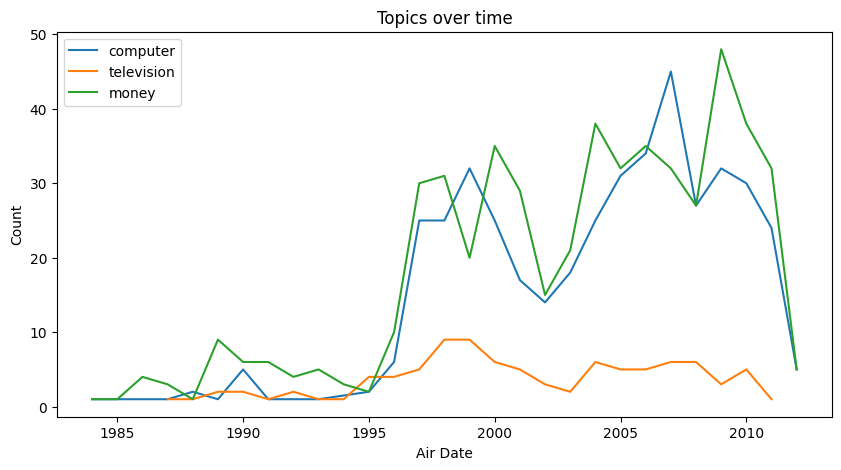

In [91]:
topics = ['computer', 'television', 'money']
fig, ax = plt.subplots(figsize=(10, 5))
for topic in topics:
    sns.lineplot(data=topic_over_time(topic, df), label=topic)
plt.title('Topics over time')
plt.legend()
plt.show()
plt.close(fig)

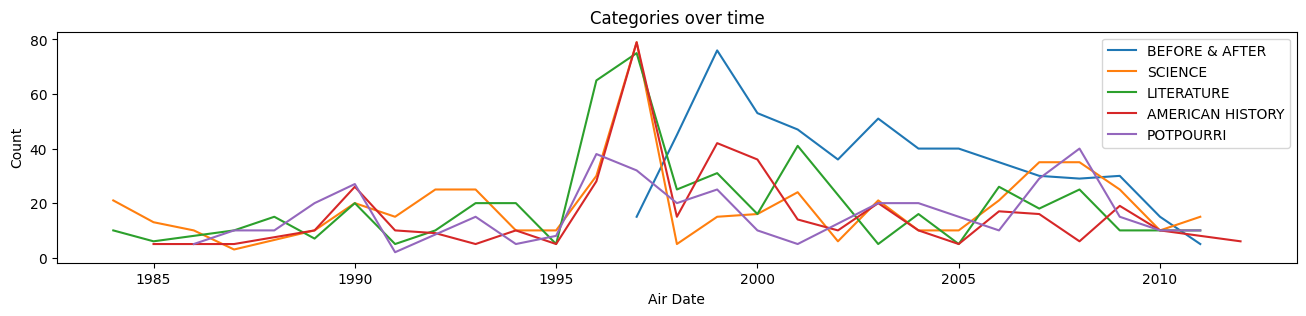

In [113]:
#categoryies over time
def categories_over_time(df):
    """
    :param df: dataframe to search in
    :return: df with count of categories by year
    """
    current_df = df.copy()
    # create count column
    current_df['Count'] = 1
    # group by year
    count_by_year_category = current_df.groupby([current_df['Air Date'].dt.year, current_df['Category']])['Count'].sum().reset_index()
    return count_by_year_category

#find top n categories
def top_categories(df, n):
    """
    :param df: dataframe to search in
    :return: list with top n categories of all time
    """
    current_df = df.copy()
    # create count column
    current_df['Count'] = 1
    # group by year
    count_by_category = current_df.groupby([current_df['Category']])['Count'].sum().reset_index().sort_values(by='Count', ascending=False)
    return count_by_category.head(n).Category.to_list()

top_10_categories = top_categories(df, 5)

fig, ax = plt.subplots(figsize=(16, 3))
for category in top_10_categories:
    sns.lineplot(data=categories_over_time(df[df['Category'] == category]), x='Air Date', y='Count', label=category)
plt.title('Categories over time')
plt.legend()

## Solution

7. Compare your program to our <a href="https://content.codecademy.com/PRO/independent-practice-projects/jeopardy/jeopardy_solution.zip">sample solution code</a> - remember, that your program might look different from ours (and probably will) and that's okay!

8. Great work! Visit <a href="https://discuss.codecademy.com/t/this-is-jeopardy-challenge-project-python-pandas/462365">our forums</a> to compare your project to our sample solution code. You can also learn how to host your own solution on GitHub so you can share it with other learners! Your solution might look different from ours, and that's okay! There are multiple ways to solve these projects, and you'll learn more by seeing others' code.